<a href="https://colab.research.google.com/github/UNT-CSCE-Projects/UNT-CSE-SpaceshipTitanic/blob/dev_azeem/FE%26DP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn import metrics
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots



from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

from google.colab import drive

In [ ]:

### Connect with google drive
def connect_and_fetch_train():

  drive.mount('/content/drive')

  ### Train & Test csv dir

  train_file = "1aFLIETCp08ZRwvYj29MPeHokzltUywhv"
  test_file = "1wB9wtBDqedOlLeVfnaMY0b_oTXmu3rg4"


  train_dir = f'https://drive.google.com/uc?id={train_file}'
  return train_dir

def connect_and_fetch_test():
  drive.mount('/content/drive')

  ### Train & Test csv dir

  test_file = "1wB9wtBDqedOlLeVfnaMY0b_oTXmu3rg4"


  test_dir = f'https://drive.google.com/uc?id={test_file}'
  return test_dir


In [ ]:
df_train = pd.read_csv(connect_and_fetch_train())
df_test = pd.read_csv(connect_and_fetch_test())
df_train = pd.read_csv(connect_and_fetch_train())
df_test = pd.read_csv(connect_and_fetch_test())

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [ ]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
def split_cabin(df):
  df[['deck','num','side']]=df['Cabin'].str.split('/',expand=True)

  return df

df_train = split_cabin(df_train)
df_test = split_cabin(df_test)


In [ ]:
df_train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
deck            199
num             199
side            199
dtype: int64

In [ ]:
label_cols = ["HomePlanet", "CryoSleep","deck","side", "Destination" ,"VIP"]
def label_encoder(train,test,columns):
    for col in columns:
        train[col] = train[col].astype(str)
        test[col] = test[col].astype(str)
        train[col] = LabelEncoder().fit_transform(train[col])
        test[col] =  LabelEncoder().fit_transform(test[col])
    return train, test

train ,test = label_encoder(df_train,df_test ,label_cols)

In [ ]:
def preprocessing_missing_value(df):
  df['Destination'].fillna(df['Destination'].mode()[0], inplace=True)
  df['CryoSleep'].fillna(df['CryoSleep'].mode()[0], inplace=True)
  df['RoomService'].fillna(df['RoomService'].min(), inplace=True)
  df['FoodCourt'].fillna(df['FoodCourt'].mean(), inplace=True)
  df['VIP'].fillna(df['VIP'].mode()[0],inplace = True)
  df['Age'].fillna(df['Age'].mode()[0],inplace = True)
  df['Spa'].fillna(df['Spa'].mean(), inplace = True)
  df['Cabin'].fillna(df['Cabin'].mode(), inplace = True)
  df['VRDeck'].fillna(df['VRDeck'].median(), inplace = True)
  df['ShoppingMall'].fillna(df['ShoppingMall'].mean(), inplace = True)
  df['HomePlanet'].fillna(df['HomePlanet'].mode()[0],inplace = True)
  df['deck'].fillna(df['deck'].mode()[0],inplace = True)
  df['side'].fillna(df['side'].mode()[0],inplace = True)
  df['num'].fillna(df['num'].median(), inplace = True)
  df['num'] = df['num'].astype('int')
  return df

df_train = preprocessing_missing_value(df_train)
df_test = preprocessing_missing_value(df_test)


In [ ]:
df_train.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
deck              0
num               0
side              0
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scr=StandardScaler()
minn=MinMaxScaler()


def scaling(df):
  df["FoodCourt"]= minn.fit_transform(df[["FoodCourt"]])
  df["RoomService"]= minn.fit_transform(df[["RoomService"]])
  df["ShoppingMall"]= minn.fit_transform(df[["ShoppingMall"]])
  df["Spa"]= minn.fit_transform(df[["Spa"]])
  df["Age"]= minn.fit_transform(df[["Age"]])
  df["VRDeck"]= minn.fit_transform(df[["VRDeck"]])
  df["num"]= scr.fit_transform(df[["num"]])

  return df
df_train = scaling(df_train)
df_test = scaling(df_test)
# add new row


KeyError: ignored

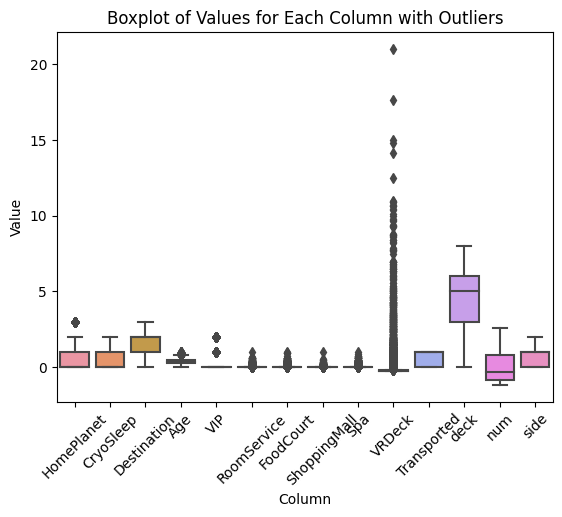

In [ ]:
sns.boxplot(data=df_train, fliersize=5)  # Set fliersize to highlight outliers
plt.title('Boxplot of Values for Each Column with Outliers')
plt.xlabel('Column')
plt.ylabel('Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

In [ ]:
from sklearn.decomposition import PCA
def reducecolpca(df):
  selected_columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa']
  data = df[selected_columns]
  n_components = 2  #number of new columns pca
  pca = PCA(n_components=n_components)
  principal_components = pca.fit_transform(data)
  pc_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])
  df["pca_price"]=pc_df['PC1']
  df["pca_pricee"]=pc_df['PC2']
  return df

df_train = reducecolpca(df_train)
df_test = reducecolpca(df_test)
df_train.drop(['RoomService','FoodCourt','ShoppingMall','Spa'],axis=1,inplace=True)

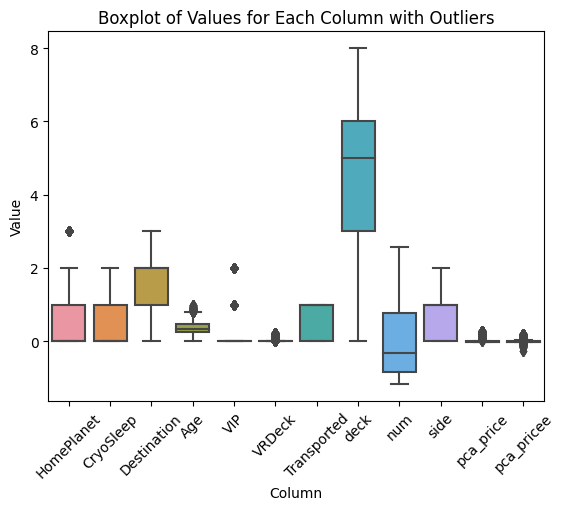

In [ ]:
sns.boxplot(data=df_train, fliersize=5)  # Set fliersize to highlight outliers
plt.title('Boxplot of Values for Each Column with Outliers')
plt.xlabel('Column')
plt.ylabel('Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

In [ ]:
  df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,VRDeck,Name,Transported,deck,num,side,pca_price,pca_pricee
0,0001_01,1,0,B/0/P,2,0.493671,0,0.000000,Maham Ofracculy,False,1,-1.177238,0,-0.020387,-0.014960
1,0002_01,0,0,F/0/S,2,0.303797,0,0.001823,Juanna Vines,True,5,-1.177238,1,-0.005536,0.001201
2,0003_01,1,0,A/0/S,2,0.734177,1,0.002030,Altark Susent,False,0,-1.177238,1,0.255494,0.070966
3,0003_02,1,0,A/0/S,2,0.417722,0,0.007997,Solam Susent,False,0,-1.177238,1,0.103240,0.031565
4,0004_01,0,0,F/1/S,2,0.202532,0,0.000083,Willy Santantines,True,5,-1.175264,1,-0.003678,0.013039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1,0,A/98/P,0,0.518987,1,0.003066,Gravior Noxnuther,False,0,-0.983795,0,0.206472,-0.049637
8689,9278_01,0,1,G/1499/S,1,0.227848,0,0.000000,Kurta Mondalley,False,6,1.781653,1,-0.020387,-0.014960
8690,9279_01,0,0,G/1500/S,2,0.329114,0,0.000000,Fayey Connon,True,6,1.783627,1,-0.020526,-0.011429
8691,9280_01,1,0,E/608/S,0,0.405063,0,0.134049,Celeon Hontichre,False,4,0.022899,1,0.017200,-0.018557


In [ ]:
def clipping_quantile(dataframe, quantile_values = None, quantile = 0.99):
    df = dataframe.copy()
    if quantile_values is None:
        quantile_values = df[["VRDeck",'pca_price','pca_pricee']].quantile(quantile)
    for num_column in ["VRDeck",'pca_price','pca_pricee']:
        num_values = df[num_column].values
        threshold = quantile_values[num_column]
        num_values = np.where(num_values > threshold, threshold, num_values)
        df[num_column] = num_values
    return df

df_train = clipping_quantile(df_train, None, 0.99)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  8693 non-null   object 
 1   HomePlanet   8693 non-null   int64  
 2   CryoSleep    8693 non-null   int64  
 3   Cabin        8494 non-null   object 
 4   Destination  8693 non-null   int64  
 5   Age          8693 non-null   float64
 6   VIP          8693 non-null   int64  
 7   VRDeck       8693 non-null   float64
 8   Name         8493 non-null   object 
 9   Transported  8693 non-null   bool   
 10  deck         8693 non-null   int64  
 11  num          8693 non-null   float64
 12  side         8693 non-null   int64  
 13  pca_price    8693 non-null   float64
 14  pca_pricee   8693 non-null   float64
dtypes: bool(1), float64(5), int64(6), object(3)
memory usage: 959.4+ KB
